## Step-1: Business Problem Understanding
- This dataset contains detailed loan information including borrower demographics, loan terms, credit history, and loan status. It is suitable for default prediction, and exploratory financial analysis using supervised machine learning techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

## Step-2: Extract

In [2]:
df = pd.read_csv('Loan_Default_Data.csv')
df

,id,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,total_pymnt
0,1077501,5000,36 months,10.65%,162.87,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,5863.155187
1,1077430,2500,60 months,15.27%,59.83,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1008.710000
2,1077175,2400,36 months,15.96%,84.33,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,3005.666844
3,1076863,10000,36 months,13.49%,339.31,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,12231.890000
4,1075358,3000,60 months,12.69%,67.79,RENT,80000.0,Source Verified,Dec-11,Current,other,3513.330000
...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,36 months,8.07%,78.42,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,2822.969293
39713,90665,8500,36 months,10.28%,275.38,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,9913.491822
39714,90395,5000,36 months,8.07%,156.84,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,5272.161128
39715,90376,5000,36 months,7.43%,155.38,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,5174.198551


In [3]:
df.shape

(39717, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   home_ownership       39717 non-null  object 
 6   annual_inc           39717 non-null  float64
 7   verification_status  39717 non-null  object 
 8   issue_d              39717 non-null  object 
 9   loan_status          39717 non-null  object 
 10  purpose              39717 non-null  object 
 11  total_pymnt          39717 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 3.6+ MB


In [5]:
df.columns.tolist()

['id',
 'loan_amnt',
 'term',
 'int_rate',
 'installment',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'total_pymnt']

In [6]:
df['id'].nunique()

39717

In [7]:
df['loan_amnt'].nunique()

885

In [8]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [9]:
df['term'].value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [10]:
df['int_rate'].nunique()

371

In [11]:
df['installment'].nunique()

15383

In [12]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [13]:
df['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [14]:
df['annual_inc'].nunique()

5318

In [15]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [16]:
df['verification_status'].value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [17]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [19]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [20]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [21]:
df['purpose'].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

In [22]:
df['total_pymnt'].nunique()

37850

**Create new columns as per requirement**

In [23]:
df['issue_d'] = pd.to_datetime(df['issue_d'],format='%b-%y')
df['issue_month'] = df['issue_d'].dt.month

In [24]:
continous = ['loan_amnt','int_rate','installment','annual_inc','total_pymnt']
count = ['term','issue_month']
categorical = ['home_ownership','verification_status','loan_status','purpose']

**Exploratory data Analysis**

In [25]:
df[continous].describe()

,loan_amnt,installment,annual_inc,total_pymnt
count,39717.000000,39717.000000,3.971700e+04,39717.000000
mean,11219.443815,324.561922,6.896893e+04,12153.596544
std,7456.670694,208.874874,6.379377e+04,9042.040766
min,500.000000,15.690000,4.000000e+03,0.000000
25%,5500.000000,167.020000,4.040400e+04,5576.930000
50%,10000.000000,280.220000,5.900000e+04,9899.640319
75%,15000.000000,430.780000,8.230000e+04,16534.433040
max,35000.000000,1305.190000,6.000000e+06,58563.679930


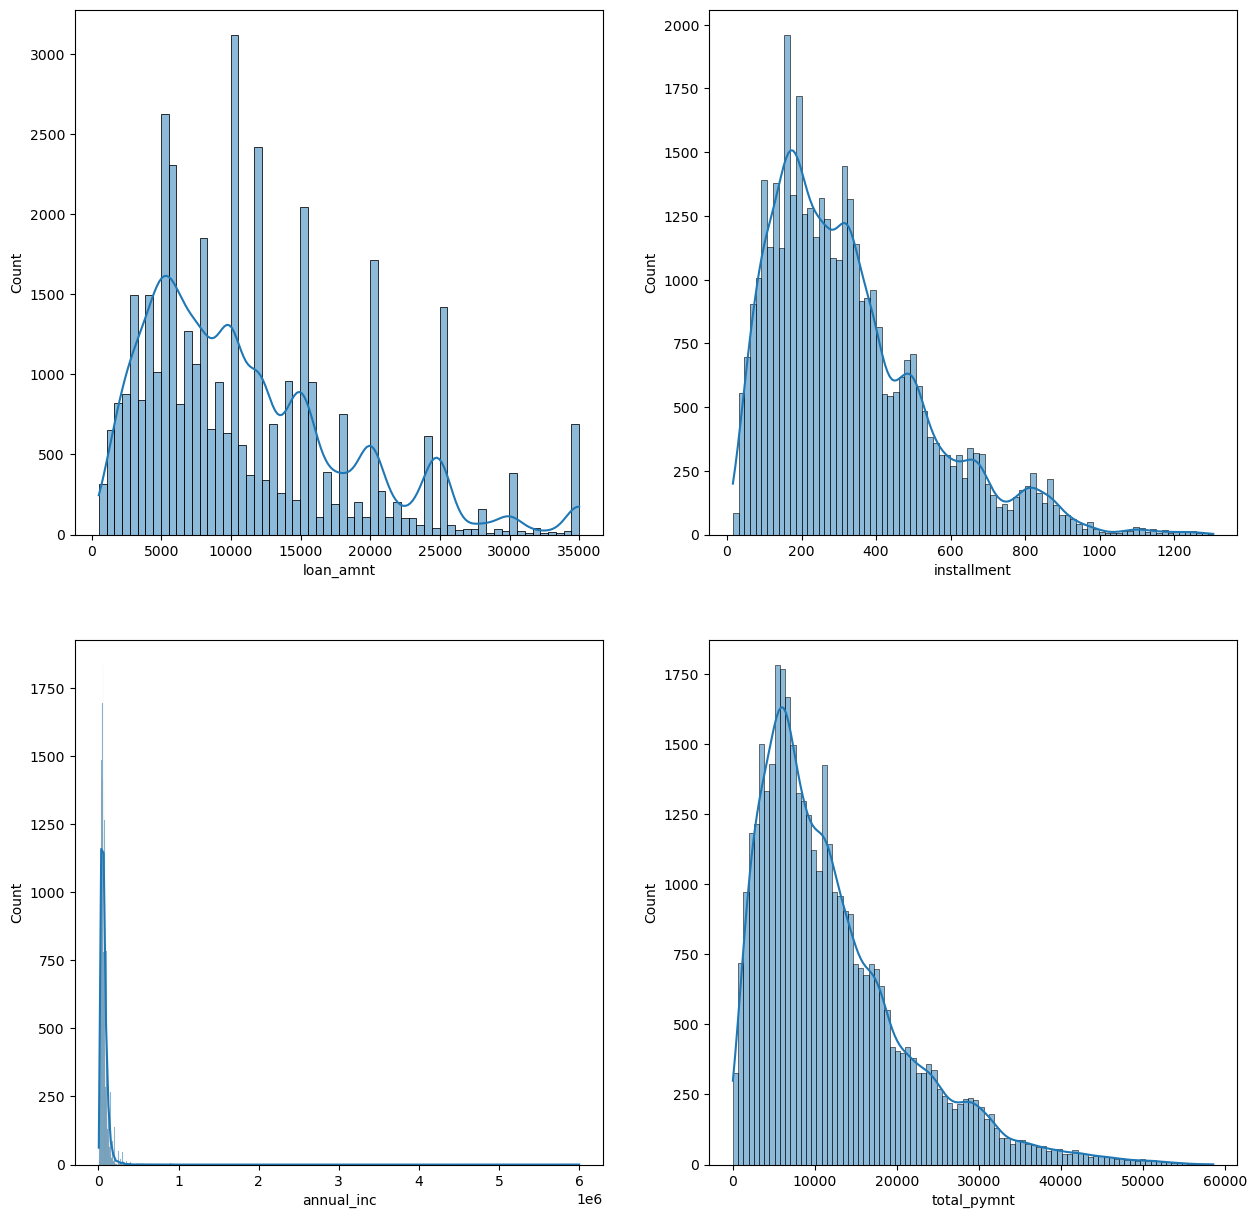

In [26]:
plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
sns.histplot(df['loan_amnt'],kde = True)

plt.subplot(2,2,2)
sns.histplot(df['installment'],kde = True)

plt.subplot(2,2,3)
sns.histplot(df['annual_inc'],kde = True)

plt.subplot(2,2,4)
sns.histplot(df['total_pymnt'],kde = True)

plt.show()

In [27]:
#Change data type as per requirement for checking correlation
df['int_rate'] = df['int_rate'].str.replace('%','').astype(float)

In [28]:
df[continous].corr()

,loan_amnt,int_rate,installment,annual_inc,total_pymnt
loan_amnt,1.000000,0.309415,0.930288,0.271149,0.886613
int_rate,0.309415,1.000000,0.282703,0.053185,0.308268
installment,0.930288,0.282703,1.000000,0.270874,0.856928
annual_inc,0.271149,0.053185,0.270874,1.000000,0.257980
total_pymnt,0.886613,0.308268,0.856928,0.257980,1.000000


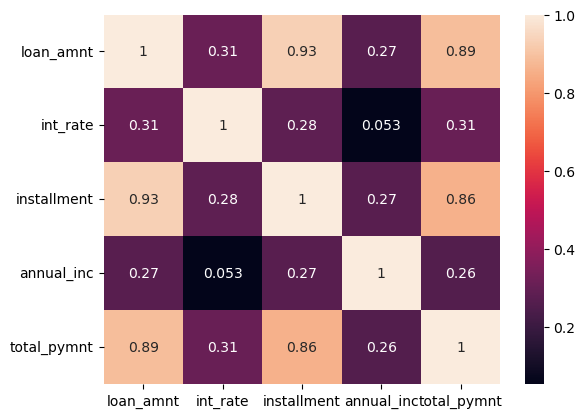

In [29]:
sns.heatmap(df[continous].corr(),annot = True)
plt.show()

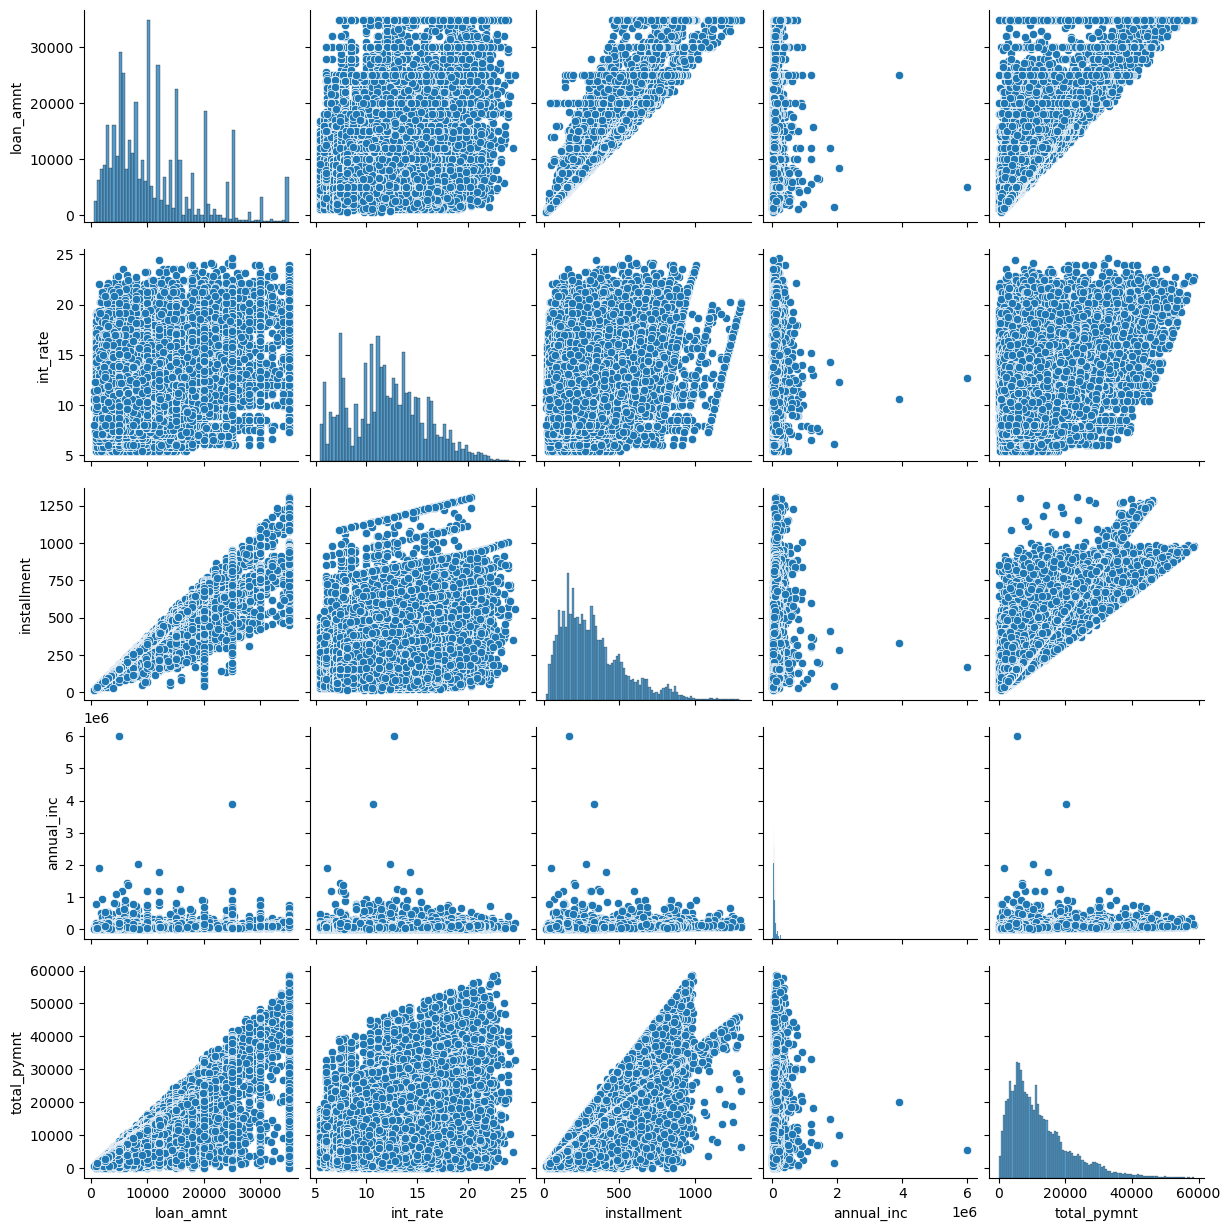

In [30]:
sns.pairplot(df[continous])
plt.show()

In [31]:
#for categorical variable
df[categorical].describe()

,home_ownership,verification_status,loan_status,purpose
count,39717,39717,39717,39717
unique,5,3,3,14
top,RENT,Not Verified,Fully Paid,debt_consolidation
freq,18899,16921,32950,18641


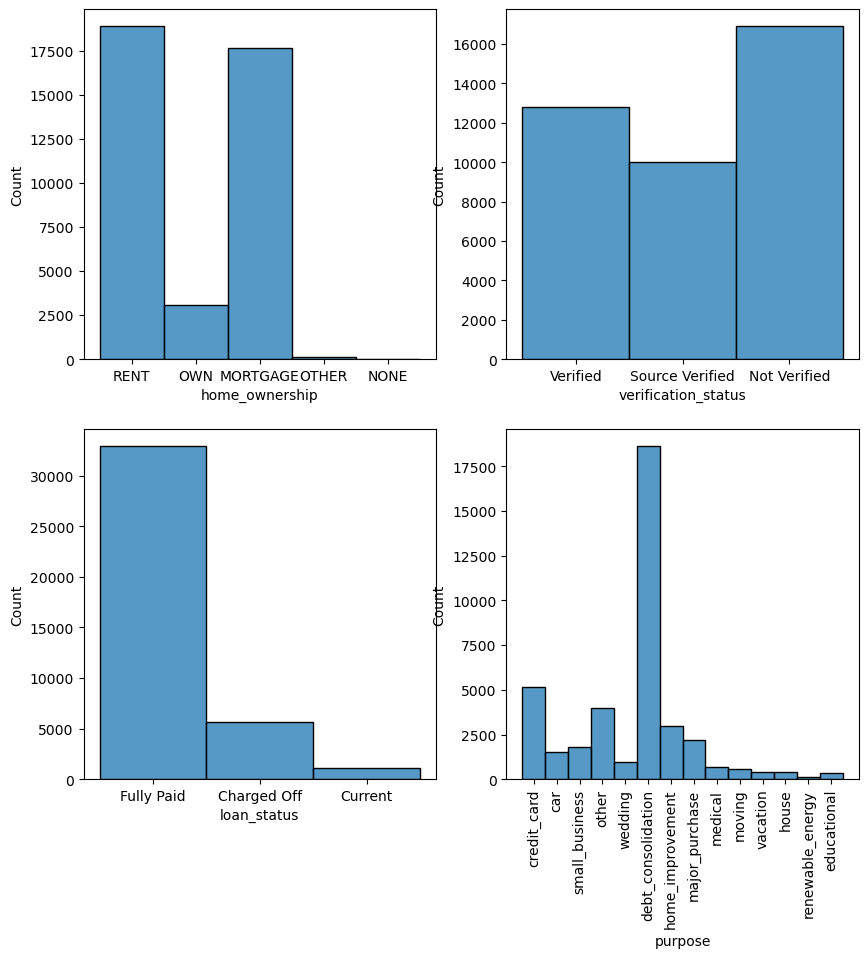

In [32]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.histplot(df['home_ownership'])

plt.subplot(2,2,2)
sns.histplot(df['verification_status'])

plt.subplot(2,2,3)
sns.histplot(df['loan_status'])

plt.subplot(2,2,4)
sns.histplot(df['purpose'])
plt.xticks(rotation = 90)

plt.show()

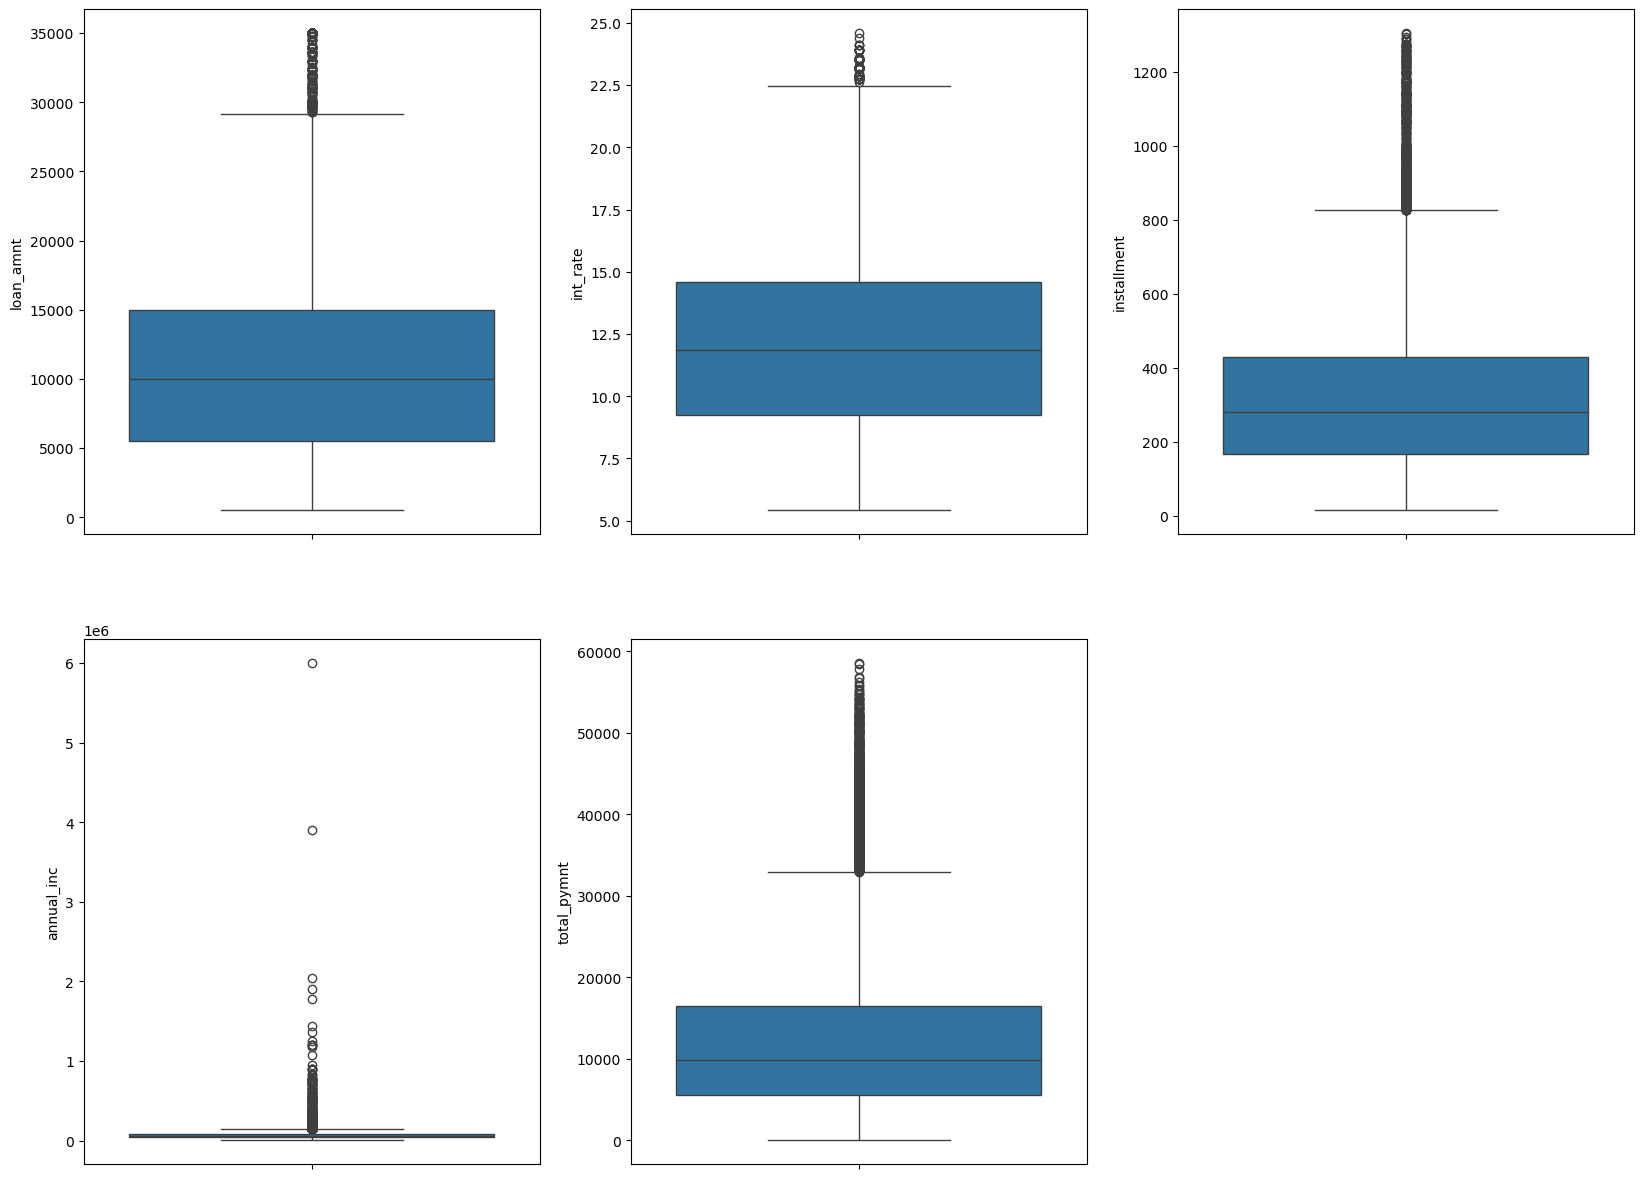

In [33]:
#Check outliers for continous variable
plt.figure(figsize = (20,15))

plt.subplot(2,3,1)
sns.boxplot(df['loan_amnt'])

plt.subplot(2,3,2)
sns.boxplot(df['int_rate'])

plt.subplot(2,3,3)
sns.boxplot(df['installment'])

plt.subplot(2,3,4)
sns.boxplot(df['annual_inc'])

plt.subplot(2,3,5)
sns.boxplot(df['total_pymnt'])

plt.show()

In [34]:
df[continous].skew()

loan_amnt       1.059317
int_rate        0.293729
installment     1.128419
annual_inc     30.949185
total_pymnt     1.339857
dtype: float64

In [35]:
df.isnull().sum()

id                     0
loan_amnt              0
term                   0
int_rate               0
installment            0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
total_pymnt            0
issue_month            0
dtype: int64

In [36]:
df.duplicated().sum()

0

## Step-3: Data Cleaning & Preparation

In [37]:
#Change data type for 'term'
df['term'] = df['term'].str.replace(' months','').astype('int')

In [38]:
#There is no missing values

In [39]:
q1 = df['loan_amnt'].quantile(0.25)

q3 = df['loan_amnt'].quantile(0.75)

iqr = q3-q1

ll = q1 - (1.5*iqr)
ul = q3 + (1.5*iqr)

In [40]:
#There is no duplicate

In [41]:
#Feature engineering

In [42]:
#Feature selection
df.drop(columns = ['id','issue_d'],inplace = True)

In [43]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,issue_month
0,5000,36,10.65,162.87,RENT,24000.0,Verified,Fully Paid,credit_card,5863.155187,12
1,2500,60,15.27,59.83,RENT,30000.0,Source Verified,Charged Off,car,1008.710000,12
2,2400,36,15.96,84.33,RENT,12252.0,Not Verified,Fully Paid,small_business,3005.666844,12
3,10000,36,13.49,339.31,RENT,49200.0,Source Verified,Fully Paid,other,12231.890000,12
4,3000,60,12.69,67.79,RENT,80000.0,Source Verified,Current,other,3513.330000,12
...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36,8.07,78.42,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,2822.969293,7
39713,8500,36,10.28,275.38,RENT,18000.0,Not Verified,Fully Paid,credit_card,9913.491822,7
39714,5000,36,8.07,156.84,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,5272.161128,7
39715,5000,36,7.43,155.38,MORTGAGE,200000.0,Not Verified,Fully Paid,other,5174.198551,7


**Data Wrangling**

In [44]:
#Feature Transformation
from scipy.stats import boxcox
df['loan_amnt'],p = boxcox(df['loan_amnt']+0.001)
df['installment'],p = boxcox(df['installment']+0.001)
df['annual_inc'],p = boxcox(df['annual_inc']+0.001)
df['total_pymnt'],p = boxcox(df['total_pymnt']+0.001)

In [45]:
#Feature encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['home_ownership'] = le.fit_transform(df['home_ownership'])
df['verification_status'] = le.fit_transform(df['verification_status'])
df['loan_status'] = le.fit_transform(df['loan_status'])
df['purpose'] = le.fit_transform(df['purpose'])

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[continous] = sc.fit_transform(df[continous])

In [47]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,issue_month
0,-0.831337,36,-0.368123,-0.734330,4,-1.611810,2,2,1,-0.615834,12
1,-1.596084,60,0.872219,-1.867178,4,-1.195604,1,0,0,-2.080471,12
2,-1.637050,36,1.057465,-1.511840,4,-2.895639,0,2,11,-1.265084,12
3,0.081095,36,0.394338,0.306146,4,-0.290022,1,2,9,0.267863,12
4,-1.407828,60,0.179561,-1.741542,4,0.577374,1,1,9,-1.124963,12
...,...,...,...,...,...,...,...,...,...,...,...
39712,-1.596084,36,-1.060782,-1.589747,0,1.133757,0,2,4,-1.319552,7
39713,-0.147516,36,-0.467458,-0.010398,4,-2.155602,0,2,1,-0.005028,7
39714,-0.831337,36,-1.060782,-0.782602,0,0.968206,0,2,2,-0.728036,7
39715,-0.831337,36,-1.232604,-0.794495,0,2.153587,0,2,9,-0.747471,7


In [48]:
df.to_csv('cleaned_loan.csv',index = False)